# 1 How models work
Machine learning models make predictions. The running example decision through the course is deciding on the selling price of a home.

**Decision tree** models make predictions by modeling a series of choices leading to a final decision. Given some **training data** in which outcomes are known, a decision tree algorithm can break the data into a series of decisions leading to multiple outcomes that are each a prediction. Each prediction is called a **leaf** of the tree. Once the decision tree has established a series of breaks, it can be applied to new data--the **testing data**--in which outcomes are unknown to generate predictions about those outcomes.

# 2 Explore data

In [1]:
# load pandas
import pandas as pd
import numpy as np

In [2]:
# import the Melbourne housing data (downloaded from https://www.kaggle.com/dansbecker/melbourne-housing-snapshot)
melbourne_data = pd.read_csv('melb_data.csv')
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [3]:
# load training data: Iowa housing data
iowa_data = pd.read_csv('train.csv')

In [4]:
# summary statistics
iowa_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 3 First machine learning model

## 3.1 Select prediction target and features

In [5]:
# examine columns of Melbourne data
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

The data have too many variables. How to select those that matter to the prediction problem?

Step 1: use intuition about how the housing market works. What variables seem most improtant to home values? (**Your theory of home prices informs your model of home prices.**)

In [6]:
# Select a column as the prediction target
y = melbourne_data.Price

In [7]:
# Select features to use in predicting Price (note type in longitude column name)
melbourne_features = ['Rooms','Bathroom','Landsize','Lattitude','Longtitude']
X = melbourne_data[melbourne_features]

In [8]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


In [9]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


##3.2 Build the model
Building a model proceeds in three steps:

1. Define
    + Model type
    + Some other parameters depending on model type
2. Fit to training data features and outcomes
3. Predict outcomes from test data features
4. Evaluate the model's prediction accuracy

In [10]:
# define the model as a decision tree
from sklearn.tree import DecisionTreeRegressor

melbourne_model = DecisionTreeRegressor(random_state=1)

Many machine learning models involve some randomness. Specifying random_state=1 sets the random number generator to a known starting point, enabling reproducibility when others use the same machine learning algorithm on the same data.

In [11]:
# fit the model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Applying the melbourne_model decision tree to the training data featuers X and known outcomes y generates a fitted decision tree that can be applied to test data to generate predicted outcomes. However, we don't have test data for the Melbourne data, so apply the decision tree model to first 5 rows of training data to see how it works.

In [12]:
# Predict house prices for first 5 rows of training data
print('Making predictions for the following 5 houses:')
print(X.head())
print('The predictions are')
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.9941
The predictions are
[1480000. 1035000. 1465000.  850000. 1600000.]


##3.3 Prediction model for Iowa housing data

###3.3.1 Define the model

In [13]:
# print features in the iowa data
iowa_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
# create target for training data: sale price
y = iowa_data['SalePrice']

In [15]:
# create feature set for training data
features = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']
X = iowa_data[features]

In [16]:
# examine feature data to ensure no gross errors
display(X.describe())
display(X.head())
display(X.tail())

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5
1459,9937,1965,1256,0,1,3,6


### 3.3.2 Specify and fit the model

In [17]:
# create decision tree from scikitlearn
iowa_model = DecisionTreeRegressor(random_state=1)

In [18]:
# fit the model to training data features X and training data outcomes y
iowa_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

### 3.3.3 Predict outcomes from training data features (we again don't have test data lacking outcomes)

In [19]:
predictions = iowa_model.predict(X)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


### 3.3.4 Evaluate model prediction accuracy
Because we generated predictions from training data where outcomes are known, we can compare the model accuracy by comparing predicted prices to actual prices.

In [20]:
pred=pd.DataFrame(predictions)
display(pred.head())
display(y.head())


,0
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# 4 Model validation
Model validation measures the quality of the model. The first form of a model is rarely the highest quality, and modeling can usually be improved through iteration through model building, fitting, validation, and rebuilding.

In most applications, the **quality measure** for a model is **predictive accuracy**. Are the model's predictions equal to or "close to" what actually happens in the process being modeled?

Model validation goes beyond simply comparing predictions to outcomes. Measures of predictive accuracy have been developed. One common measure is **mean absolute error (MAE)**.

The MAE is calculated by subtracting the predicted outcome for each prediction from its actual outcome, summing the absolute value of each calculation, and dividing the sum by the number of predictions.

The sklearn package has a function to calculate AME: mean_absolute_error(actual outcomes, predicted outcomes).

In [21]:
# calculate MAE for iowa_model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, predictions)

62.35433789954339

## 4.1 The danger of "in-sample" model validation
The MAE calculated above for the iowa_model is not useful because the predictions were generated from the same training data used to fit the model.

This is bad becauase it overweights arbitrary patterns in the training data that might not exist outside the training data.

Because the point of a machine learning model is to make predictions when outcomes are not known, we need to assess the model's performance using data in which the model has not already seen the outcome.

How can we do this? We don't use all of our data when we fit the model. That way, we have additional data to test the model on that has not been used to train the model. Data set aside in this way are called **validation data**.

## 4.2 Validation data
We now have three types of data for machine learning:

1. training data
2. test data
3. validation data

Training and validatino data have features and known outcomes. Test data has features but unknown outcomes.

In [22]:
# split iowa training data into training and validation data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [23]:
# fit iowa housing decision tree to training data
iowa_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [24]:
# predict iowa house prices using validation data
val_predictions = iowa_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

32966.449315068494


The MAE using in-sample prediction was about 62.

The MAE using validation prediction is about 33,000.

Quite a difference, with the model being far closer in prediction when using in-sample prediction than validation prediction. That's because in-sample prediction already has the answers.

In [25]:
# average iowa home price
iowa_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The mean house price in the full data is about $180,921. An MAE of $33,000 means the model's predictions are, on average, wrong by about 20%.

# 5 Underfitting and overfitting

## 5.1 Experimenting with models
For a decision tree, one of the more important options is the **tree depth**, the number of decision splits between the top level (all data) and prediction leaves.

The more leaves that are generated, the sparser the data in each leaf.

The greater the tree depth, the greater the number of leaves and the sparser the data in each leaf. At the extreme, we could generate a decision tree where each leaf has one outcome in it, and the tree would make predictions that are very accurate.

However, such a model would likely perform poorly with new data. A model with high performance in training data and low performance in validation data is **overfit**.

Conversely, we might **underfit** a model by failing to capture enough important elements. Such a model would make poor predictions in both the training and validation data.

Both overfitting and underfitting produce poor validation scores. Somewhere between a model being overfit and underfit is an optimal point at which the validation score is maximized. That is usually the desired configuration of the model.

For a decision tree, the max_leaf_nodes argument specifies the maximum number of leaves in the tree. This can be used to assess different model configurations.

In [26]:
# define a function to assess model with varoious max_leaf_node values
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X,train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [27]:
# for loop to assess different max_leaf_node values
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print('Max leaf nodes: %d \t\t Mean Absolute Error: %d' %(max_leaf_nodes, my_mae))

Max leaf nodes: 5 		 Mean Absolute Error: 35190
Max leaf nodes: 50 		 Mean Absolute Error: 27825
Max leaf nodes: 500 		 Mean Absolute Error: 32662
Max leaf nodes: 5000 		 Mean Absolute Error: 33382


For the Iowa home price data used above, the MAE is least with 50 nodes, suggesting that is better than 5, 500, or 5000.

After determining the optimal number of leaves, the model can be fit on the full training data using the optimal leaf number.

In [28]:
# train model on full training data
final_iowa_model = DecisionTreeRegressor(max_leaf_nodes=50)
final_iowa_model.fit(X, y)

final_iowa_pred = final_iowa_model.predict(X)
print(mean_absolute_error(y, final_iowa_pred))

20288.66665281336


Prior to tuning the decision tree, the MAE was about \\$32,000. After tuning, it is about $20,000.

# 6 Random forests
Most machine learning techniques face tradeoffs between overfitting and underfitting. Decision trees, for example, can be overfit if tree depth increases and underfit if tree depth decreases. Many machine learning models use clever techniques to adddress this tradeoff.

Rather than use a single decision tree, the random forest model uses many random decision trees, each referred to as a component tree, and generates a prediction by averaging all the predictions of the component trees.

In [29]:
# Load Melbourne data
melbourne_data = pd.read_csv('melb_data.csv') 
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [30]:
# import random forest model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

C:\Users\Nicholas\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
# random forest model on Melbourne housing data

# fit model
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)

# predict outcomes from validation data
melb_preds  = forest_model.predict(val_X)

# calculate MAE
print(mean_absolute_error(val_y, melb_preds))

202806.6128254788


In [32]:
# random forest model on Iowa housing data
iowa_data = pd.read_csv('train.csv')

iowa_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
# define outcome in training data
y = iowa_data['SalePrice']

In [34]:
# create feature set from training data
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = iowa_data[features]

X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [35]:
# split out some validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [36]:
# specify the random forest model
rf_model = RandomForestRegressor(random_state=1)

In [37]:
# fit the model
rf_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [38]:
# predict outcomes from validation data
rf_preds = rf_model.predict(val_X)

In [39]:
# calculate MAE using validation data
rf_val_mae = mean_absolute_error(val_y, rf_preds)
print(rf_val_mae)

22762.42931506849


The MAE of the random forest is about \\$22,700, which is **more** than the \\$20,000 MAE of the decision tree after tuning with maximum leaf nodes technique above.

# 7 Handling missing values
Python libraries represent missing values as NaN, standing for "not a number".

In [40]:
# toy data
data = {'desk':['3',np.nan,'32','2','36','32'],
        'chair':['1200','902','120','693','302','890'],
       'table':['2','12','16','20','86','9'],
       'floor':['23',np.nan,'26','83','20','21']}
df = pd.DataFrame(data)
df

,desk,chair,table,floor
0,3,1200,2,23
1,NaN,902,12,NaN
2,32,120,16,26
3,2,693,20,83
4,36,302,86,20
5,32,890,9,21


In [41]:
# count NaN by column and print columns and number of NaN
miss_count_by_col = (df.isnull().sum())
print(miss_count_by_col[miss_count_by_col > 0])

desk     1
floor    1
dtype: int64


Many libraries will return an error when building a model including NaN observations.

Possible ways of handling NaNs:

- Drop columnns with missing values
- Impute data from non-missing observations
- Impute data with flag for which values were imputed

## 7.1 Drop missing columns

In [42]:
# create a subset of columns without any missing values
df_nomiss = df.dropna(axis=1)
df_nomiss

,chair,table
0,1200,2
1,902,12
2,120,16
3,693,20
4,302,86
5,890,9


It's important to drop the same columns in test and training data.

In [43]:
y = df['table']
X = df[['desk','chair','floor']]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

print(y)
print(train_X)

0     2
1    12
2    16
3    20
4    86
5     9
Name: table, dtype: object
  desk chair floor
4   36   302    20
0    3  1200    23
3    2   693    83
5   32   890    21


In [44]:
# create list of columns with NaN
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
print(cols_with_missing)

['desk', 'floor']


In [45]:
# drop NaN columns from original data
reduced_original = df.drop(cols_with_missing, axis = 1)
print(reduced_original)

  chair table
0  1200     2
1   902    12
2   120    16
3   693    20
4   302    86
5   890     9


In [46]:
# drop NaN from training data
reduced_test = train_X.drop(cols_with_missing, axis = 1)
print(reduced_test)

  chair
4   302
0  1200
3   693
5   890


## 7.2 Imputation
Imputation creates new data to fill in NaN values.

In [47]:
# impute data with SimpleImputer from sklearn
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
df_with_imputed = my_imputer.fit_transform(df)
print(df_with_imputed)

[[   3.  1200.     2.    23. ]
 [  21.   902.    12.    34.6]
 [  32.   120.    16.    26. ]
 [   2.   693.    20.    83. ]
 [  36.   302.    86.    20. ]
 [  32.   890.     9.    21. ]]


## 7.3 Extending imputation
Imputation can be extended by creating markers for which observations were imputed and where were in the original data.

In [48]:
# make a copy to avoid changing original data
new_df = df.copy()

In [49]:
# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())

for col in cols_with_missing:
    new_df[col + '_was_missing'] = new_df[col].isnull()
    
display(new_df)

newcols=new_df.columns

,desk,chair,table,floor,desk_was_missing,floor_was_missing
0,3,1200,2,23,False,False
1,NaN,902,12,NaN,True,True
2,32,120,16,26,False,False
3,2,693,20,83,False,False
4,36,302,86,20,False,False
5,32,890,9,21,False,False


In [50]:
# imputation
my_imputer = Imputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns=newcols
new_df

,desk,chair,table,floor,desk_was_missing,floor_was_missing
0,3.0,1200.0,2.0,23.0,0.0,0.0
1,21.0,902.0,12.0,34.6,1.0,1.0
2,32.0,120.0,16.0,26.0,0.0,0.0
3,2.0,693.0,20.0,83.0,0.0,0.0
4,36.0,302.0,86.0,20.0,0.0,0.0
5,32.0,890.0,9.0,21.0,0.0,0.0


# 8 Using categorical data with one hot encoding

## 8.1 What is one hot encoding
Categorical variables take only a limited number of values corresponding to discrete categories.

Categorical variables must be **encoded** to use them in most machine learning models.

One popular approach to encoding is **one hot encoding**. One hot works well unless the variable has more than 15 values.

One hot encoding creates new variables that take 0 and 1 values corresponding to each category of the categorical variable.

One hot encoding can be done using the pandas function **.get_dummies()**.

In [51]:
# toy data with one categorical variable having two values
dict = {'yesno':['yes','no','no','yes','yes','yes','no']}
yesno = pd.DataFrame(dict)
display(yesno)

,yesno
0,yes
1,no
2,no
3,yes
4,yes
5,yes
6,no


In [52]:
# one hot encode the toy data
one_hot = pd.get_dummies(yesno)
display(one_hot)

,yesno_no,yesno_yes
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
5,0,1
6,1,0


In [53]:
# join with original data
both = pd.concat([yesno,one_hot],axis=1)
display(both)

,yesno,yesno_no,yesno_yes
0,yes,0,1
1,no,1,0
2,no,1,0
3,yes,0,1
4,yes,0,1
5,yes,0,1
6,no,1,0


## 8.2 Incorporating one hot encoding in the Iowa house data

In [54]:
# find categorical variables
iowa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [55]:
potential_categorical = ['BsmtQual']

In [56]:
iowa_data[potential_categorical].head()

,BsmtQual
0,Gd
1,Gd
2,Gd
3,TA
4,Gd


In [57]:
set(iowa_data['BsmtQual'])

{'Ex', 'Fa', 'Gd', 'TA', nan}

In [58]:
bsmt_cat = pd.get_dummies(iowa_data['BsmtQual'])
display(bsmt_cat.head())
display(bsmt_cat.describe())

,Ex,Fa,Gd,TA
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


,Ex,Fa,Gd,TA
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.082877,0.023973,0.423288,0.444521
std,0.275790,0.153016,0.494249,0.497083
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [59]:
# join to data
iowa_data_cat = pd.concat([iowa_data,bsmt_cat],axis=1)

In [60]:
# add encoding to features
display(features)
ia_features = features + ['Ex','Fa','Gd','TA']
display(ia_features)

['LotArea',
 'YearBuilt',
 '1stFlrSF',
 '2ndFlrSF',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd']

['LotArea',
 'YearBuilt',
 '1stFlrSF',
 '2ndFlrSF',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Ex',
 'Fa',
 'Gd',
 'TA']

In [61]:
# create training feature data
X = iowa_data_cat[ia_features]
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,Ex,Fa,Gd,TA
0,8450,2003,856,854,2,3,8,0,0,1,0
1,9600,1976,1262,0,2,3,6,0,0,1,0
2,11250,2001,920,866,2,3,6,0,0,1,0
3,9550,1915,961,756,1,3,7,0,0,0,1
4,14260,2000,1145,1053,2,4,9,0,0,1,0


In [62]:
# define training outcome data
y = iowa_data_cat['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [63]:
# split iowa training data into training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [64]:
# specify the random forest model
rf_model = RandomForestRegressor(random_state=1)

# fit the model
rf_model.fit(train_X, train_y)

# predict outcomes from validation data
rf_preds = rf_model.predict(val_X)

# calculate MAE using validation data
rf_val_mae = mean_absolute_error(val_y, rf_preds)
print(rf_val_mae)

23814.575806914545


The MAE without the basement quality variable was \\$22,762.

The MAE with the basement quality variable is \\$23,814.

Adding the basement quality variable increased MAE, suggesting it is not a good choice as a feature.

# 9 XGBoost

## 9.1 What is XGBoost
XGBoost is a leading machine learning model for working with tabular data, the type of data most often stored in pandas dataframes. XGBoost models perform very well in many Kaggle competitions. To maximize accuracy, XGBoost models require more knowledge and model tuning that models like Random Forests.

Technically, XGBoost models are a form of **Gradient Boosted Decision Trees**. These models begin with an initial prediction state provided by the researcher and iterate through the following steps:

1. Calculate the prediction errors from the initial prediction state
2. Build a model to predict the prediction errors
3. Add predictions from the error prediction model to an "ensemble" of models
4. Add predictions from all models in the ensemble
5. Return a prediction prediction
6. Use the prediction as the new initial prediction state

## 9.2 Example using the Iowa data

In [65]:
# load data and drop NaN
data = pd.read_csv('train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)

In [66]:
# set training outcome as SalePrice and features as all non-object variables
y = data.SalePrice
X = data.drop(['SalePrice'],axis=1).select_dtypes(exclude=['object'])

In [67]:
# create training and test data
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

C:\Users\Nicholas\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [68]:
# impute NaN in training features
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [69]:
# set XGBoost model
from xgboost import XGBRegressor
my_model = XGBRegressor()

# set verbose = False to prevent printing updates with each iteration
my_model.fit(train_X, train_y, verbose=False)

# predict
predictions = my_model.predict(test_X)

# calculate MAE
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 20231.85002140411


## 9.3 Tuning parameters for XGBoost
XGBoost takes many arguments. Several important ones are:

- n_estimators
- early_stopping_rounds
- learning rate
- n_jobs

The **n_estimators** argument specifies how many iterations the model goes through before stopping. Too few causes underfitting, too many causes overfitting. Experiment with values. The optimal value often depends on the **learning rate**.

The **early_stopping_rounds** argument tries to automatically find the ideal value for n_estimators. It causes the model to stop iterating when the validation score stops improving between iterations, even if it occurs before the number of iterations specified by n_estimators. **It's smart to set a high value for n_estimators and use early_stopping_rounds to automatically stop iterating before reaching that limit**. 

When using **early_stopping_rounds**, some data need to be set aside to check the number of rounds to use. To later fit the model to all the data, set **n_estimators** to the value found by **early_stopping_rounds** and don't include **early_stopping_rounds** in the XGBoost call.

The **learning rate** argument changes how the model accumulates predictions. By default, the model adds predictions from each component of the ensemble. The **learning rate** argument multiplies each prediction by the specified number prior to adding them together. If the learning rate is < 0, this means each additional prediction contributes less to the overall prediction. This can help reduce overfitting, allowing use of a high **n_estimators**.

Generally, an XGBoost model with a small learning rate and large number of estimators will make more accurate predictions, though run time increases because the model does more iterations before stopping.

The **n_jobs** argument introduces parallel processing for situations where runtime is a consideration. It is typically set to the number of cores of the processor being used to fit the model.

In [70]:
# fit the model with tuning parameters
my_tuned_model = XGBRegressor(n_estimators=1000)
my_tuned_model.fit(train_X, train_y, early_stopping_rounds = 5, 
                   eval_set=[(test_X, test_y)], verbose = True)

# predict
tuned_predictions = my_tuned_model.predict(test_X)

# MAE
print("Mean Absolute Error : " + str(mean_absolute_error(tuned_predictions, test_y)))

[0]	validation_0-rmse:183054
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:166149
[2]	validation_0-rmse:151118
[3]	validation_0-rmse:137289
[4]	validation_0-rmse:125498
[5]	validation_0-rmse:114382
[6]	validation_0-rmse:104809
[7]	validation_0-rmse:96303.2
[8]	validation_0-rmse:88152.6
[9]	validation_0-rmse:81560.4
[10]	validation_0-rmse:75679.7
[11]	validation_0-rmse:69980.8
[12]	validation_0-rmse:65455.3
[13]	validation_0-rmse:61581.9
[14]	validation_0-rmse:57722.8
[15]	validation_0-rmse:54707.6
[16]	validation_0-rmse:52202
[17]	validation_0-rmse:49911.9
[18]	validation_0-rmse:48101.6
[19]	validation_0-rmse:46606.9
[20]	validation_0-rmse:45380.4
[21]	validation_0-rmse:44463.9
[22]	validation_0-rmse:43618.5
[23]	validation_0-rmse:42959
[24]	validation_0-rmse:42397.2
[25]	validation_0-rmse:42080.1
[26]	validation_0-rmse:41734.7
[27]	validation_0-rmse:41518.3
[28]	validation_0-rmse:41264.2
[29]	validation_0-rmse:41170.3
[30]	validation_0-rmse:4121

The model stopped after run 57 and returned the prediction from run 52. It stopped at 57 because early_stopping_rounds = 5 specified the model stop if 5 consecutive runs didn't improve the RMSE.

In [71]:
# a learning model
my_learning_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_learning_model.fit(train_X, train_y, early_stopping_rounds = 5, 
                   eval_set=[(test_X, test_y)], verbose = True)

# predict
learned_predictions = my_tuned_model.predict(test_X)

# MAE
print("Mean Absolute Error : " + str(mean_absolute_error(learned_predictions, test_y)))

[0]	validation_0-rmse:192416
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:183557
[2]	validation_0-rmse:175063
[3]	validation_0-rmse:167001
[4]	validation_0-rmse:159426
[5]	validation_0-rmse:152155
[6]	validation_0-rmse:145446
[7]	validation_0-rmse:139031
[8]	validation_0-rmse:132860
[9]	validation_0-rmse:126933
[10]	validation_0-rmse:121407
[11]	validation_0-rmse:115904
[12]	validation_0-rmse:110985
[13]	validation_0-rmse:106165
[14]	validation_0-rmse:101790
[15]	validation_0-rmse:97508
[16]	validation_0-rmse:93618.3
[17]	validation_0-rmse:90052
[18]	validation_0-rmse:86632
[19]	validation_0-rmse:83190
[20]	validation_0-rmse:80150.5
[21]	validation_0-rmse:77093
[22]	validation_0-rmse:74237
[23]	validation_0-rmse:71703.3
[24]	validation_0-rmse:69090.9
[25]	validation_0-rmse:66869.8
[26]	validation_0-rmse:64535.7
[27]	validation_0-rmse:62592
[28]	validation_0-rmse:60792.4
[29]	validation_0-rmse:58999.2
[30]	validation_0-rmse:57510.7
[31]	validatio

The MAE of the learning model is identical to the MAE of the non-learning model, and it took the learning model more iterations to produce the same prediction. It took more iterations because the learning argument penalized subsequent predictions more, which did not happen in the tuned, non-learning model. 

# 10 Partial dependence plots

## 10.1 What are partial dependence plots
Partial dependence plots describe the contribution of individual features to prediction values. They allow investigation of which features matter, and how they matter, to the outcome.

Partial dependence plot interpretation is similar to interpreting coefficients in linear or logistic regressions, but partial dependence plots can capture more complex patterns than such coefficients.

Partial dependence is calculated after the ML model has been fit to the data. In the prediction step, predictions are made for each value of the feature of interest. The chagnes in predicted outcomes are plotted, which generates a line plot.

## 10.2 Example

In [72]:
iowa_data.columns
iowa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [73]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

# select features
features = ['LotArea','LotFrontage','1stFlrSF','2ndFlrSF']
X = iowa_data[features]
y = iowa_data['SalePrice']
my_imputer = Imputer()
X = my_imputer.fit_transform(X)

# set model
pd_model = GradientBoostingRegressor()

# fit the model
pd_model.fit(X, y)

# make the plots
my_plots_1 = plot_partial_dependence(pd_model,
                                  features = [0,1],
                                  X=X,
                                   feature_names=features,
                                   grid_resolution=20)

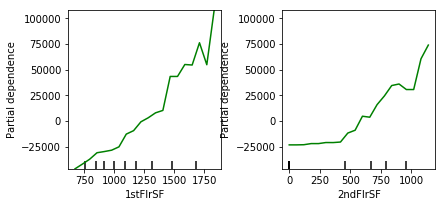

In [74]:
# remaining plots
my_plots_2 = plot_partial_dependence(pd_model,
                                  features = [2,3],
                                  X=X,
                                   feature_names=features,
                                   grid_resolution=20)

Insights

- Larger lot area associated with higher price, until getting so large price begins falling
- Lot frontage has a complex relationship with selling price
- Strong positive association between 1st Floor SF and price
- Strong positive association between 2nd Floor SF and price

# 11 Pipelines

## 11.1 What are pipelines?
Pipelines bundle preprocessing and modeling steps together to organize data processing and modeling. The entire bundle can be used as a single step.

Benefits of pipelines include

- cleaner code
- fewer bugs
- easier conversion to production
- more options for model testing

A pipeline must start with a transformer and end with a model.

Most scikit-learn objects are either **transformers** or **models**.

Transformers pre-process before modeling. An example transformer is the Imputer class for filling in missing values. Transformers are applied with the transform command.

Models make predictions. Models are applied with the predict command.

## 11.2 Example

In [75]:
from sklearn.pipeline import make_pipeline

# create a pipeline that imputes missing data and models with a random forest
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

# fit the model
my_pipeline.fit(train_X, train_y)

# predict
predictions = my_pipeline.predict(test_X)

In [76]:
# the pipeline executes this non-pipelined code:

# my_imputer = Imputer()
# my_model = RandomForestRegressor()
# imputed_train_X = my_imputer.fit_transform(train_X)
# imputed_test_X = my_imputer.transform(test_X)
# my_model.fit(imputed_train_X, train_y)
# predictions = my_model.predict(imputed_test_X)

# 12 Cross-validation

## 12.1 What is cross-validation?
Cross-validation is an alternative means of creating training and validation data to the train_test_split function.

The train_test_split function breaks the training data into training and validation data. The training data are used to fit the model. The validation data are used to make predictions and assess the quality of those predictions.

Cross-validation conducts the train_test_split many times, creating different break points between training and validation data each time to avoid model prediction being driven by a single arbitrary break point.

Each iteration of splitting the data is called a **fold**. For example, 5-fold cross-validation splits the training data in 5 different ways and generates five different assessments of model fit performance.

Cross-validation generally gives a more accurate measure of model quality, but it takes more time to run than a single train-test split.

On small datasets, the extra computational burden of cross-validation is not a big deal. But on large datasets where model runtime becomes an issue, a simple train-test split reduces computation time, and the large amount of data means the model quality assessment from a single split will be okay.

## 12.2 Example using Melbourne housing data

In [77]:
data = pd.read_csv('melb_data.csv')
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price

In [78]:
# specify a pipeline
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [79]:
# get cross-validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-311052.5799798  -300736.95814391 -303777.29828575]


The "scoring" argument in the cross_val_score() function specifies what measure of model quality to report.

We generated three negative MAE measures for the model. To compare against other models, it is useful to have a single measure. We can use the mean.

In [80]:
print("Mean Absolute Error %2f" %(-1 * scores.mean()))

Mean Absolute Error 305188.945470


The number of folds can be specified with the **cv argument** passed to the cross_val_score function. Default is cv = 3

In [81]:
# run with 5 folds
scores = cross_val_score(my_pipeline, X, y, 
                         scoring='neg_mean_absolute_error',
                        cv=5)
print("MAE with 5 folds %2f" %(-1 * scores.mean()))

MAE with 5 folds 285075.266379


# 13 Data leakage
Data leakage is one of the most common and costly problems in machine learning.

Specifically, data leakage causes a model to appear to make accurate predictions until the model begins to be used as a decisin making input. The model then becomes innaccurate.

There are two main types of data leakage

1. Leaky predictors
2. Leaky validation strategies

## 13.1 Leaky predictors

Leaky predictors occurs when the model is trained on features that are not available when the model is later used to make predictions in new data.

**Target leakage** occurs when a predictor value changes only after a target value is determined. For example, consider a model predicting whether someone will get sick. Imagine the training data has the target "sick" and predictor features including "took medicine". Training a model on these data would likely find a strong predictive power of "took medicine." But when this model is applied to data in which the sickness status is unknown, it is likely to perform poorly because "took medicine" is often determined *after* someone has gotten sick. The feature is a function of the target value. If the target value is unknown, the feature has a different value than in the training data when the target was known.

To prevent target leakage, any feature determined after the target value is determined should be excluded from the model.

To prevent leaky predictors

1. Look for features correlated with the target
2. If the model is extremely accurate, likely have a leakage problem

## 13.2 Leaky validation strategies

Leaky validation strategies occur when training and validation data are not cleanly and consistently defined. This most commonly occurs when the data later use for validation somehow influences the creation of the training data, for example by preprocessing the data with imputation prior to splitting the training and validation data.

To prevent leaky validation strategies

1. Exclude validation data from any type of fitting, including fitting of preprocessing steps
2. Use pipelines and do preprocessing inside the pipeline

## 13.2 Example using credit card data

In [82]:
# load data
data = pd.read_csv('AER_credit_card_data.csv',
                  true_values = ['yes'],
                  false_values = ['no'])
print(data.head())

   card  reports       age  income     share  expenditure  owner  selfemp  \
0  True        0  37.66667  4.5200  0.033270   124.983300   True    False   
1  True        0  33.25000  2.4200  0.005217     9.854167  False    False   
2  True        0  33.66667  4.5000  0.004156    15.000000   True    False   
3  True        0  30.50000  2.5400  0.065214   137.869200  False    False   
4  True        0  32.16667  9.7867  0.067051   546.503300   True    False   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [83]:
# dimensions
data.shape

(1319, 12)

Data is relatively small, so cross-validation is probably a better strategy than train-test split that is sensitive to small data sizes.

In [84]:
# define target and features
y = data.card
X = data.drop(['card'], axis = 1)

In [85]:
# define pipeline
from sklearn.ensemble import RandomForestClassifier
modeling_pipeline = make_pipeline(RandomForestClassifier())

cv_scores = cross_val_score(modeling_pipeline, X, y, scoring = 'accuracy')

print('Cross-val accuracy: %f' %cv_scores.mean())

Cross-val accuracy: 0.979525


It's very rare to find models with 98% accuracy, suggesting a data leakage problem.

Since pipeline was used, leaky validation strategy an unlikely culprit.

Look at the features to assess target leakage.

**Target**: dummy variable = 1 if application for credit card accepted.

Would any features change *after* the target is determined?

- share
- expenditure
- majorcards
- active

Share is the ratio of monthly credit card expenditure to yearly income. Having an additional credict card application approved could alter this ratio.

Expenditure is the average monthly credit card expenditure, which could increase with additional card approvals.

Majorcards is a count of major credit cards held, which would change if a major credit card application is improved.

Active is the number of active credit accounts, which would increase if an application were approved.

In [86]:
# check expenditure variable correlation with target

# create a subset of the expenditures variable for all observations with "card" = 1
expenditures_cardholders = data.expenditure[data.card]

# create a subset of the expenditures variable for all observations with "card" = 0
expenditures_noncardholders = data.expenditure[~data.card]

# compare the average expenditures of each group
print('Fraction of those who received a card with no expenditures: %.2f' \
      %(( expenditures_cardholders == 0).mean()))
print('Fraction of those who received a card with no expenditures: %.2f' \
      %((expenditures_noncardholders == 0).mean()))

Fraction of those who received a card with no expenditures: 0.02
Fraction of those who received a card with no expenditures: 1.00


The interpretation of these results is that 2% of applicants who had a new card approved (card == 1) had zero expenditures, while 100% of those who did not receive a card (card == 0) had not expenditures. This strongly suggests that expenditures were placed on newly-approved cards, such that the expenditure feature value was changed after the target variable, an example of **target leakage**.

Since share is related to expenditure, it likely suffers from target leakage, too.

Features active and majorcards might also suffer data leakage and should be excluded.

In [87]:
# rebuild model dropping data leakage features
potential_leaks = ['share','expenditure','active','majorcards']
X2 = X.drop(potential_leaks, axis=1)
cv_scores = cross_val_score(modeling_pipeline, X2, y, scoring = 'accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.813514


The accuracy is much lower than before, but the model is more likely to be about 80% accurate when applied to new data. The previous model had high training accuracy but would likely perform quite poorly when applied to new data due to data leakage.